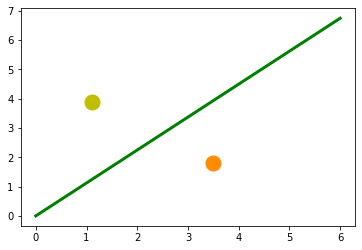

In [25]:
# https://www.python-course.eu/dividing_lines_between_classes.php
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "o", 
        color="darkorange", 
        markersize=15)
ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()


In [6]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if the orange is below the line,
# a positive value is expected:
print(orange[0] * m - orange[1])

# check if the lemon is above the line,
# a negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


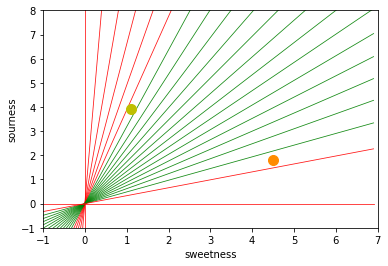

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

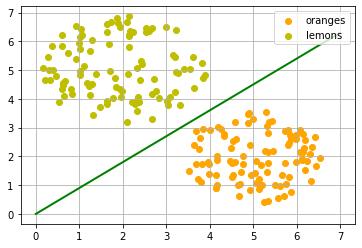

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

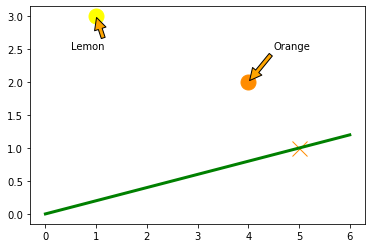

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fruits(p1, p2, point_on_line=(5,1)):
    X = np.arange(0, 7)
    fig, ax = plt.subplots()
    ax.plot(p1[0], p1[1], "o", 
            color="darkorange", 
            markersize=15)
    ax.annotate("Orange", 
                xy=(p1[0], p1[1]), 
                xytext=(p1[0]+0.5, p1[1]+0.5),
                arrowprops=dict(facecolor='orange', shrink=0.05))
    ax.plot(p2[0], p2[1], "o", 
            color="yellow", 
            markersize=15)
    ax.annotate("Lemon", 
                xy=(p2[0], p2[1]), 
                xytext=(p2[0]-0.5, p2[1]-0.5),
                arrowprops=dict(facecolor='orange', shrink=0.05))
    ax.plot(*point_on_line, "x", 
            color="darkorange", 
            markersize=15)
    # calculate gradient:
    m = point_on_line[1] / point_on_line[0]  
    ax.plot(X, m * X, "g-", linewidth=3)
    plt.show()


orange = (4, 2)
lemon = (1, 3)
point = (5, 1)
plot_fruits(p1=orange, p2=lemon, point_on_line=point)

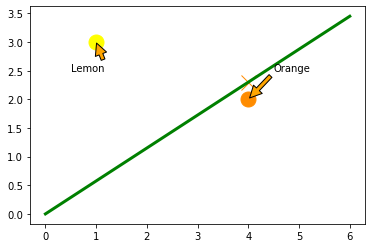

0.2999999999999998

In [10]:
delta = 0.3
plot_fruits(p1=(4, 2), p2=(1, 3), point_on_line=(4, 2+delta))

new_slope = (2 + delta) / 4
# position of orange:
new_slope * orange[0] - orange[1]

In [11]:
targeted_slope = new_slope
initial_slope = point[1] / point[0]
error = targeted_slope - initial_slope

# the targeted_slope can be seen as the following sum:
initial_slope + error

0.575

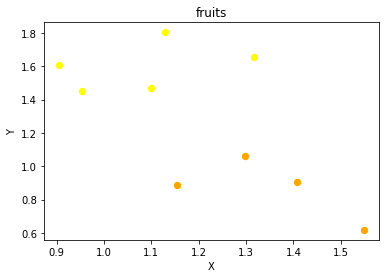

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

number_of_samples = 9
centers = [(1, 1.5), (1.5, 1)]
data, labels = make_blobs(n_samples=number_of_samples, 
                          cluster_std=0.2,
                          centers=np.array(centers),
                          random_state=42)

fruits = [(data[i], labels[i]) for i in range(len(data))]

fig, ax = plt.subplots()
colours = ["yellow", "orange"]
label_name = ["Lemons", "Oranges"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], 
               data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='fruits');

0.3 0.41544252971893364
0.7154425297189336 1.4073164614375075 0.9068540492859486
0.7154425297189336 0.1808263111956887
0.8962688409146223 1.2974337759331152 1.0628494665190549


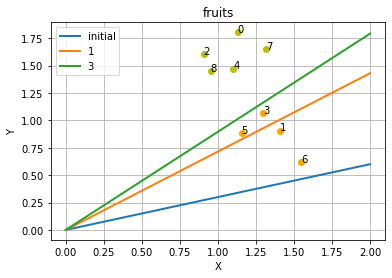

0.8962688409146223


In [13]:
slope = 0.3
def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        #print(label, pos2line)
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            print(slope, error)
            slope += error 
            print(slope, x, y)
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            #print(pos2line, label)
            print(slope, error)
            slope += error 
            print(slope, x, y)
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

X = np.arange(0, 3)
fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(slope)

ax.legend()
ax.grid()
plt.show()

print(slope)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'fruits')]

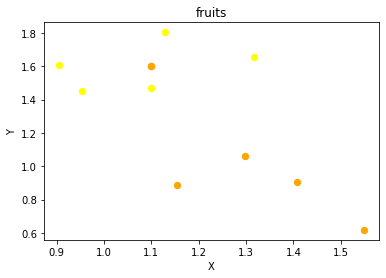

In [15]:
data = np.concatenate((data, np.array([[1.1, 1.6]])))
labels = np.concatenate((labels, np.array([1])))

fig, ax = plt.subplots()
colours = ["yellow", "orange"]
label_name = ["Lemons", "Oranges"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], 
               data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='fruits')

0.3 0.41544252971893364
0.7154425297189336 0.1808263111956887
0.8962688409146223 0.6491857045399231


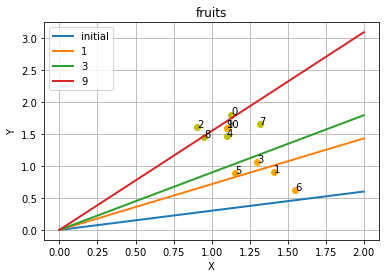

1.5454545454545454


In [16]:
start_slope = 0.3
def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1   
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        #print(label, pos2line)
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            print(slope, error)
            slope += error 
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            print(slope, error)
            slope += error 
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope


fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope)

ax.legend()
ax.grid()
plt.show()

print(slope)

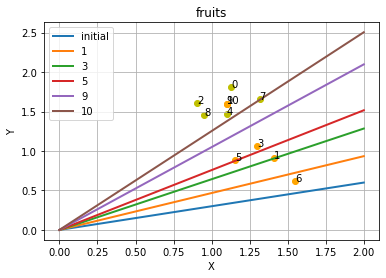

1.2523276864585993


In [17]:
learning_rate, start_slope = 0.3, 0.3
def adjust(slope=0.3, learning_rate=0.3):
    line = None
    delta = 0.3
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1 
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            slope += error * learning_rate
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            slope += error * learning_rate
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope, learning_rate)

ax.legend()
ax.grid()
plt.show()

print(slope)

In [18]:
import numpy as np

class Perceptron:
    
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
    
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-2.0284822543880674, -1.7016673390858954, -1.9775180403412485, -1.6890726044336033, -1.478820535823756, -1.3555179517779066, -1.143228616534341, -1.1505886372069813, -1.7507163195019244, -1.8026696573748944, 2.1911745881199436, 1.8034284351582885, 1.68586008915377, 0.6415251744907098, 0.45137016361714033, 2.6285387562203466, 1.955165142122963, 2.132337158427025, 0.8969917804297443, 2.0764189876642196, 

In [19]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


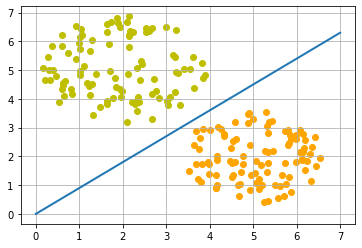

0.9


In [20]:
import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X,  linewidth=2)


ax.grid()
plt.show()

print(slope)

In [21]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(2.1435772398665094, 6.216486428068078), (2.4016696808337654, 4.6581550763272865), (4.177184535735981, 1.8767796376668795), (6.075294854095704, 2.150074783550845), (1.0001344400629653, 5.935400207070396), (0.9307673280553552, 6.5506926660329645), (3.7792124634864406, 2.6336257672668024), (4.172243830722851, 2.0225861426857765), (6.3569986520701, 2.3322660423078023), (4.14880691274707, 1.3565896586057793)] [1, 1, 0, 0, 1, 1, 0, 0, 0, 0]


In [22]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.3542005   1.48240462]


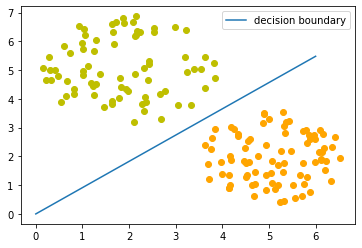

[-1.3542005   1.48240462]


In [23]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

2 -2.490434031692736 [-1.15315536 -0.46303389] (4.177184535735981, 1.8767796376668795)
4 0.6474832899697827 [-0.85311503  1.31758617] (1.0001344400629653, 5.935400207070396)
6 3.7666059549548407 [-1.98687877  0.52749844] (3.7792124634864406, 2.6336257672668024)
10 0.9135161070358929 [-1.3542005   1.48240462] (2.108927556351526, 3.1830206100066833)


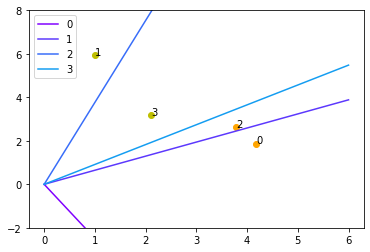

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 15
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()